<a href="https://colab.research.google.com/github/machiwao/CCDEPLRL_EXERCISES_COM222/blob/main/exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [1]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-04-22 06:32:23--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.24, 104.192.142.25, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.2s    

2025-04-22 06:32:31 (16.2 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [1]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
   creating: fruits/fruits/
  inflating: fruits/fruits/.DS_Store  
   creating: fruits/fruits/test/
  inflating: fruits/fruits/test/.DS_Store  
   creating: fruits/fruits/test/apple/
  inflating: fruits/fruits/test/apple/Screen Shot 2018-06-08 at 5.25.54 PM.png  
  inflating: fruits/fruits/test/apple/Screen Shot 2018-06-08 at 5.26.05 PM.png  
  inflating: fruits/fruits/test/apple/Screen Shot 2018-06-08 at 5.26.13 PM.png  
  inflating: fruits/fruits/test/apple/Screen Shot 2018-06-08 at 5.26.19 PM.png  
  inflating: fruits/fruits/test/apple/Screen Shot 2018-06-08 at 5.26.24 PM.png  
  inflating: fruits/fruits/test/apple/Screen Shot 2018-06-08 at 5.26.29 PM.png  
  inflating: fruits/fruits/test/apple/Screen Shot 2018-06-08 at 5.26.36 PM.png  
  inflating: fruits/fruits/test/apple/Screen Shot 2018-06-08 at 5.26.41 PM.png  
  inflating: fruits/fruits/test/apple/Screen Shot 2018-06-08 at 5.26.47 PM.png  
  inflating: fruits/fruits/test/apple/Screen S

Import the libraries

In [168]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [179]:
img_height, img_width = 64, 64
batch_size = 20

Split the images into train, validation and test

In [180]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 744 files belonging to 4 classes.
Found 106 files belonging to 4 classes.
Found 207 files belonging to 4 classes.


Display sample images from the dataset

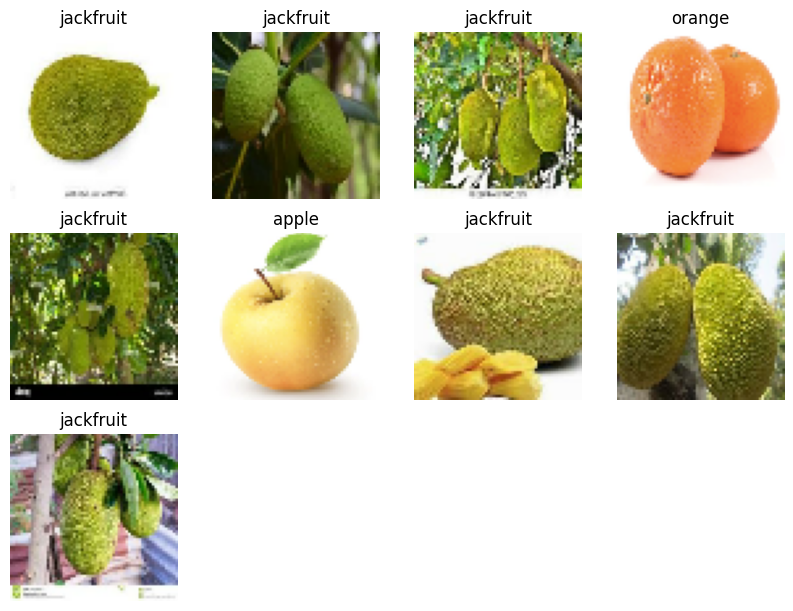

In [181]:
class_names = ["apple", "banana", "jackfruit", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [182]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(64, 64, 3)),

    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),  # New: Light regularization
    tf.keras.layers.Dense(4)  # Logits
])

Define the optimizer and loss function

In [183]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
    metrics=['accuracy']
)

Train the model

In [184]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',     # Metric to watch
    patience=15,             # Wait 3 epochs with no improvement
    restore_best_weights=True  # Restore model weights from the best epoch
)

In [185]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    callbacks=[early_stopping]
)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.4932 - loss: 1.1215 - val_accuracy: 0.8019 - val_loss: 0.5472
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8446 - loss: 0.4354 - val_accuracy: 0.8679 - val_loss: 0.3456
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9003 - loss: 0.3113 - val_accuracy: 0.8396 - val_loss: 0.4652
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9301 - loss: 0.2380 - val_accuracy: 0.9340 - val_loss: 0.2710
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9122 - loss: 0.2493 - val_accuracy: 0.9434 - val_loss: 0.1875
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9458 - loss: 0.1624 - val_accuracy: 0.9340 - val_loss: 0.2181
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9596 - loss: 0.1075 - val_accuracy: 0.9340 - val_loss: 0.1694
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9508 - loss: 0.1518 - val_accuracy: 0

In [186]:
import matplotlib.pyplot as plt
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 12))
  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_title('model accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train', 'validation'], loc='upper left')
  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title('model loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')

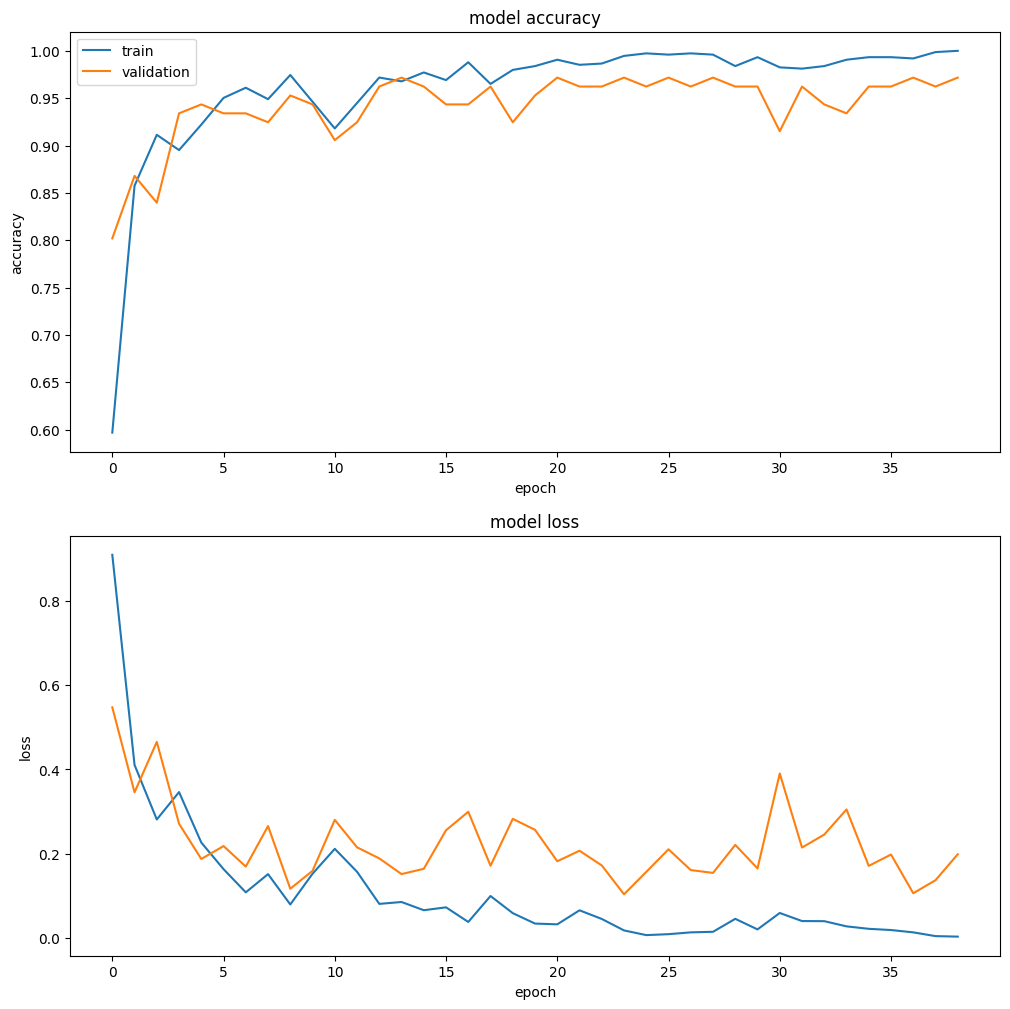

In [187]:
plot_history(history)

Test the model

In [188]:
model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9871 - loss: 0.0709


[0.09332408756017685, 0.9806763529777527]

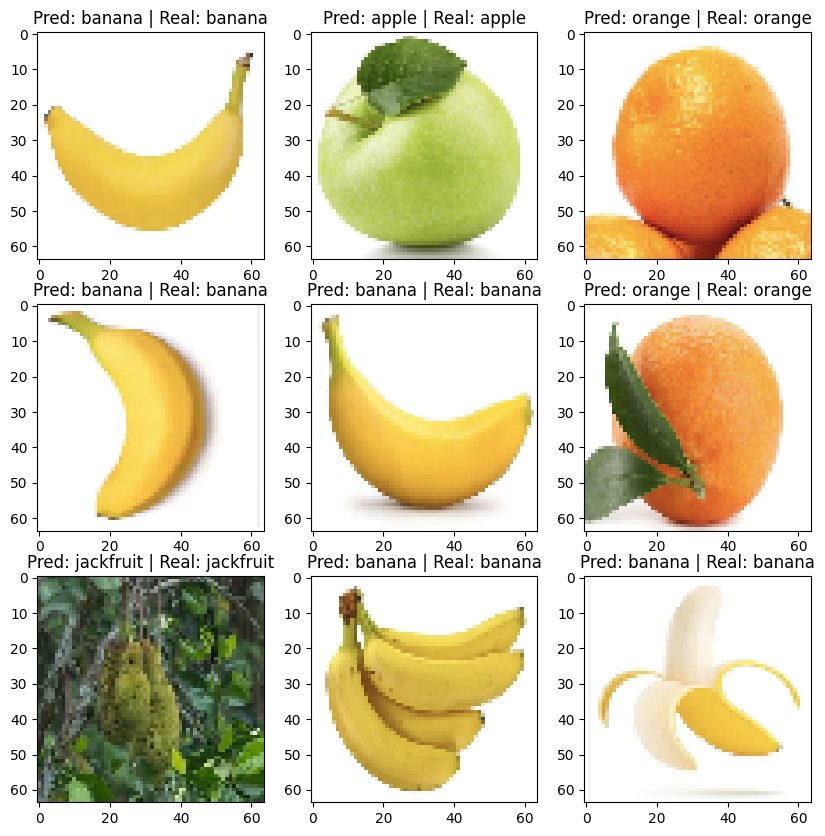

In [189]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Save the model

In [190]:
model.save('fruitmodel.keras')